# PARTE 1: 25 % carga y limpieza

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


# Cargar el dataset desde el archivo CSV
df = pd.read_csv("diamonds.csv")
print("Primeras filas del dataset:")
print(df.head())

# Reemplazar '?' por NaN
df = df.replace('?', np.nan)

# Reemplazar valores cero en las columnas x, y, z por NaN
df[["x", "y", "z"]] = df[["x", "y", "z"]].replace(0, np.nan)

# Conversión de tipos de datos
df["carat"] = df["carat"].astype("float32")
df["price"] = df["price"].astype("float32")
df["x"] = df["x"].astype("float32")
df["y"] = df["y"].astype("float32")
df["z"] = df["z"].astype("float32")
df["clarity"] = df["clarity"].astype("category")
df["cut"] = df["cut"].astype("category")
df["color"] = df["color"].astype("category")

# Rellenar valores nulos con la mediana (numéricos) o la moda (categóricos)
df["carat"] = df["carat"].fillna(df["carat"].median())
df["cut"] = df["cut"].fillna(df["cut"].mode().iloc[0])
df["color"] = df["color"].fillna(df["color"].mode().iloc[0])
df["clarity"] = df["clarity"].fillna(df["clarity"].mode().iloc[0])
df["x"] = df["x"].fillna(df["x"].median())
df["y"] = df["y"].fillna(df["y"].median())
df["z"] = df["z"].fillna(df["z"].median())

# Eliminar filas duplicadas
df = df.drop_duplicates()

# Crear una nueva columna ordinal para 'cut'
mapeo_cut = {"Ideal": 1, "Premium": 2, "Very Good": 3, "Good": 4, "Fair": 5}
df["cut_int"] = df["cut"].map(mapeo_cut)
print("\nPrimera vista de la columna ordinal 'cut_int':")
print(df[["cut", "cut_int"]].head())

# Realizar One-Hot Encoding para las columnas categóricas 'cut', 'color', 'clarity'
df_encoded = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)

print("Primeras filas del DataFrame tras One-Hot Encoding:")
print(df_encoded.head())


Primeras filas del dataset:
   carat      cut color clarity  depth  table price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75

Primera vista de la columna ordinal 'cut_int':
       cut cut_int
0    Ideal       1
1  Premium       2
2     Good       4
3  Premium       2
4     Good       4
Primeras filas del DataFrame tras One-Hot Encoding:
   carat  depth  table  price     x     y     z cut_int  cut_Good  cut_Ideal  \
0   0.23   61.5   55.0  326.0  3.95  3.98  2.43       1     False       True   
1   0.21   59.8   61.0  326.0  3.89  3.84  2.31       2     False      False   
2   0.23   56.9   65.0  327.0  4.05  4.07  2.31       4      True      False   
3   0.29   62.4   

# PARTE 2: 25 % transformaciones:

In [9]:
# Crear una columna 'price_iva' a partir de 'price' con un 21% de IVA
df["price_iva"] = df["price"] * 1.21
print(df[["price", "price_iva"]].head())

# Crear una columna 'price_discount' con un descuento basado en condiciones
def calculate_discount(row):
    if row["price"] < 1000 and row["cut"] == "Ideal":
        return row["price"] * 0.90
    elif 1000 <= row["price"] <= 5000 and row["cut"] == "Premium":
        return row["price"] * 0.85
    return row["price"]

df["price_discount"] = df.apply(calculate_discount, axis=1)

print(df[["cut", "price", "price_discount"]].head())


# Crear una nueva columna 'volumen' combinando las columnas 'x', 'y', 'z'
df["volumen"] = df["x"] * df["y"] * df["z"]
print(df[["x", "y", "z", "volumen"]].head()) 

# Ordenar por dos columnas con sort_values(): 'cut' y 'price'
df_sorted = df.sort_values(by=["cut", "price"])
print(df_sorted[["cut", "price"]].head()) 

# Agrupar por las 3 columnas categóricas ('cut', 'clarity', 'color') y calcular la media, max, min de las columnas numéricas 'price', 'carat', 'depth'
df_grouped = df.groupby(by=['cut', 'color', 'clarity']).agg(
    price_mean=('price', 'mean'),
    price_max=('price', 'max'),
    price_min=('price', 'min'),
    carat_mean=('carat', 'mean'),
    depth_mean=('depth', 'mean')
).reset_index()

print(df_grouped.head())



   price   price_iva
0  326.0  394.460022
1  326.0  394.460022
2  327.0  395.670013
3  334.0  404.140015
4  335.0  405.350006
       cut  price  price_discount
0    Ideal  326.0           293.4
1  Premium  326.0           326.0
2     Good  327.0           327.0
3  Premium  334.0           334.0
4     Good  335.0           335.0
      x     y     z    volumen
0  3.95  3.98  2.43  38.202034
1  3.89  3.84  2.31  34.505856
2  4.05  4.07  2.31  38.076889
3  4.20  4.23  2.63  46.724579
4  4.34  4.35  2.75  51.917248
        cut  price
8      Fair  337.0
28270  Fair  361.0
31611  Fair  369.0
31615  Fair  371.0
10030  Fair  416.0
    cut color clarity   price_mean  price_max  price_min  carat_mean  \
0  Fair     D      I1  7383.000000    15964.0     2491.0    1.877500   
1  Fair     D      IF  1619.666626     2211.0     1208.0    0.380000   
2  Fair     D     SI1  4273.344727    16386.0      644.0    0.913793   
3  Fair     D     SI2  4355.143066    16086.0      536.0    1.016964   
4  Fair   

C:\Users\nerea\AppData\Local\Temp\ipykernel_16060\2296253933.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(by=['cut', 'color', 'clarity']).agg(


# PARTE 3: 20 % distribuciones:

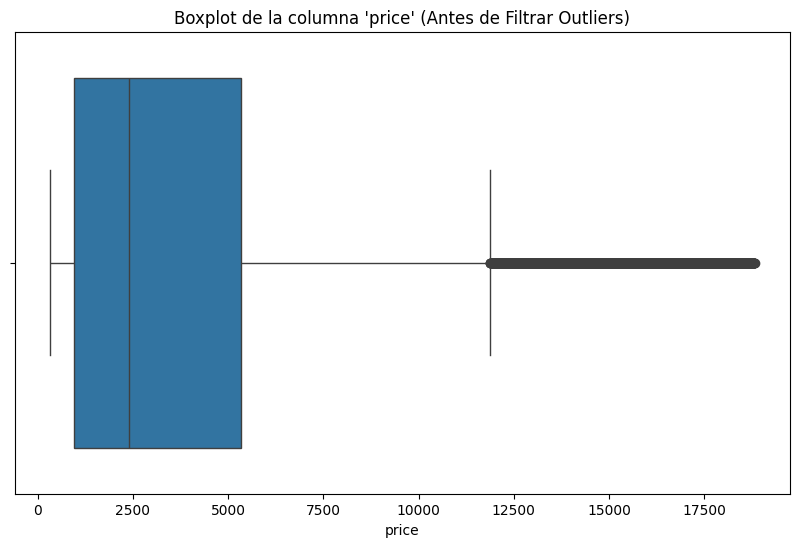

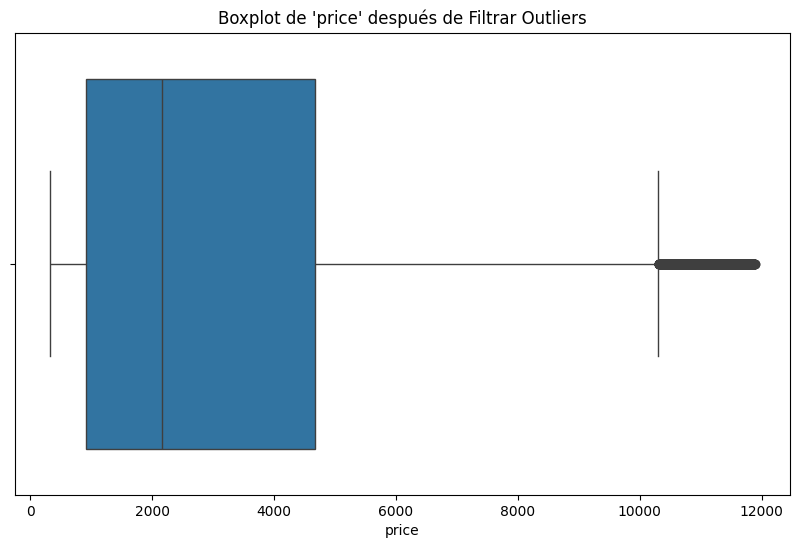

Límite inferior: -5610.75, Límite superior: 11887.25
Asimetría de 'price': nan
Curtosis de 'price': nan


In [10]:


# 1. **Outliers: Visualización de Q1 y Q3, límites de Tukey y filtrado sobre la columna precio**
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Límites de Tukey
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los outliers
filtered_df = df[(df['price'] >= lower_limit) & (df['price'] <= upper_limit)]

# Visualización
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title("Boxplot de la columna 'price' (Antes de Filtrar Outliers)")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['price'])
plt.title("Boxplot de 'price' después de Filtrar Outliers")
plt.show()

print(f"Límite inferior: {lower_limit}, Límite superior: {upper_limit}")

# 2. **Asimetría, Curtosis y Transformaciones (logaritmo y raíz cuadrada)**
asimetria = skew(df['price'])
curtosis = kurtosis(df['price'])

print(f"Asimetría de 'price': {asimetria}")
print(f"Curtosis de 'price': {curtosis}")

# Transformaciones (logaritmo y raíz cuadrada)
df['log_price'] = np.log(df['price'])
df['sqrt_price'] = np.sqrt(df['price'])



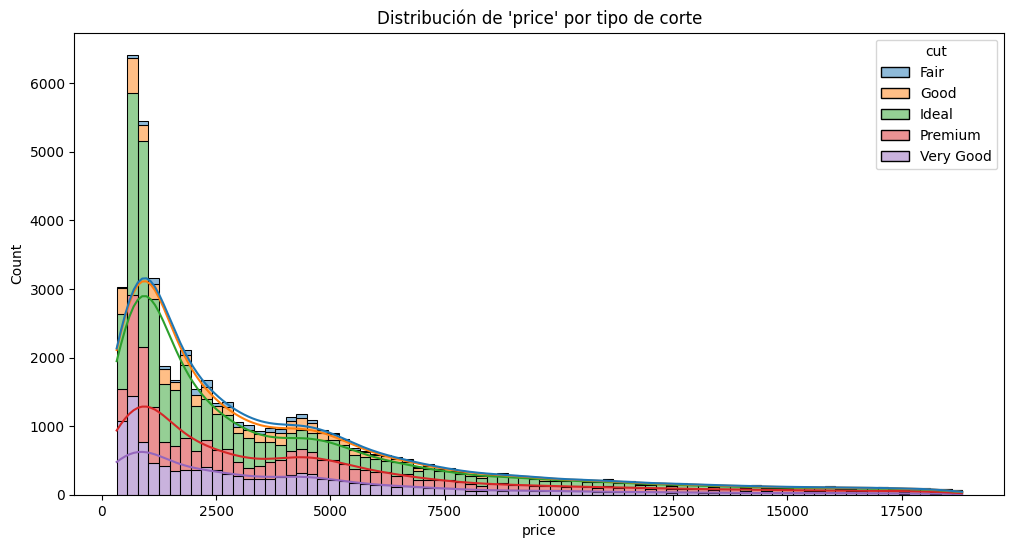

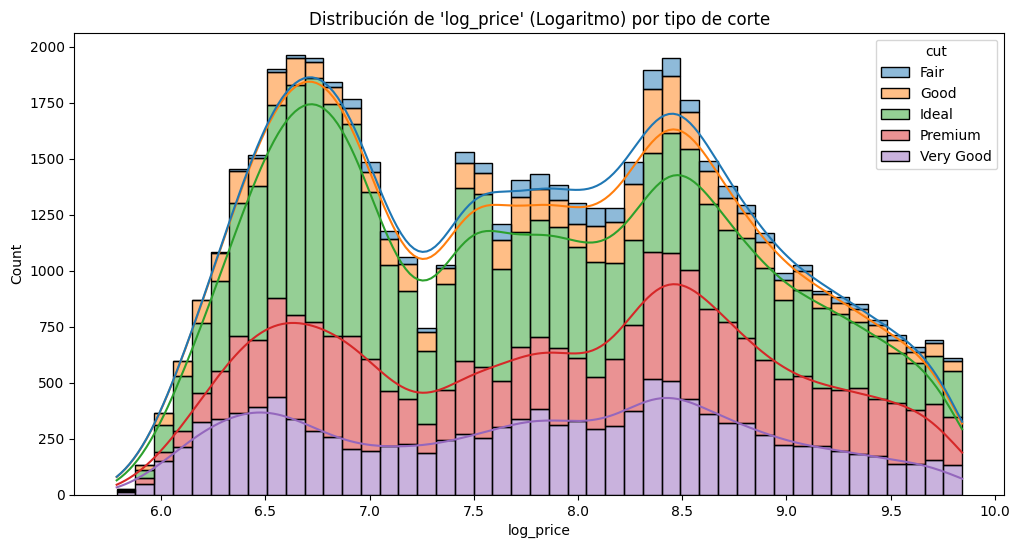

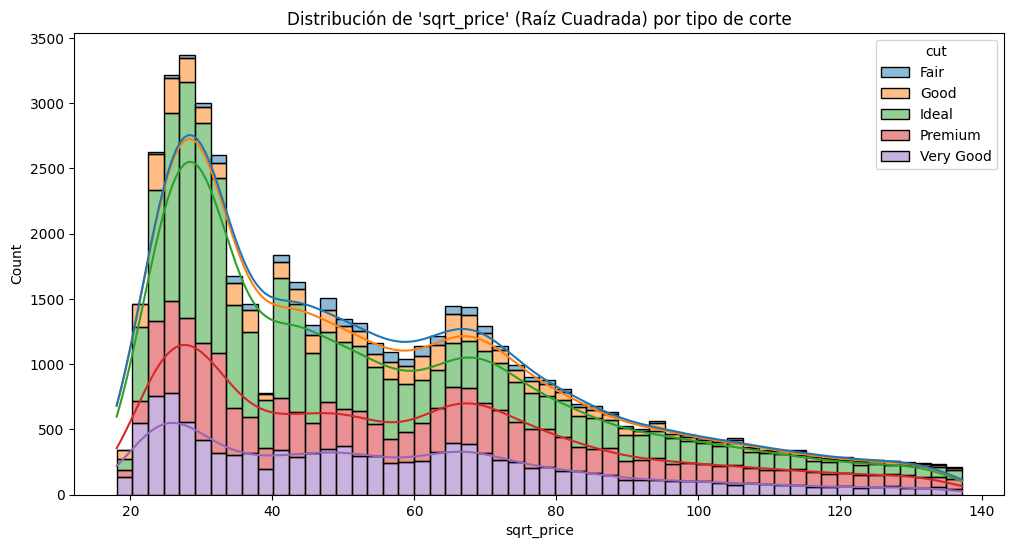

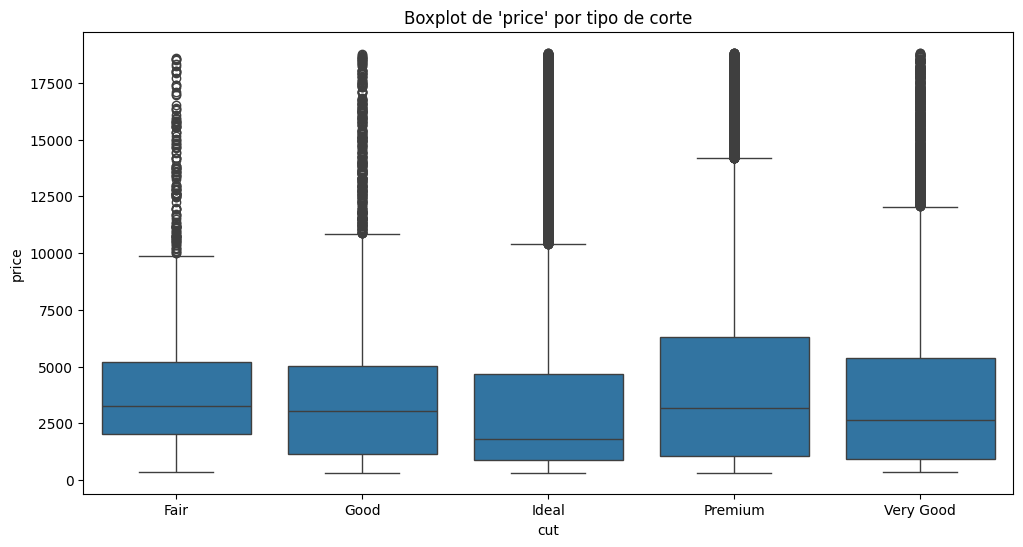

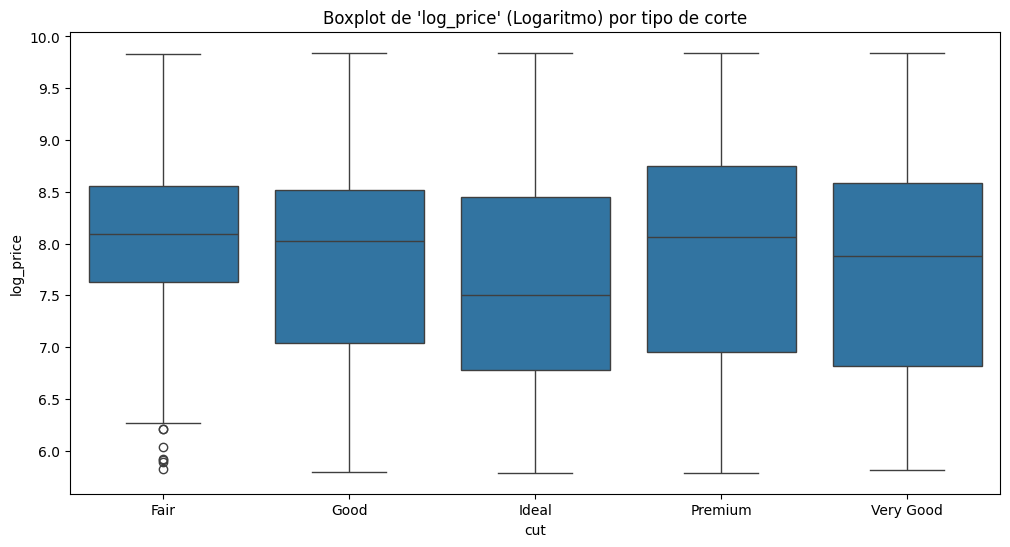

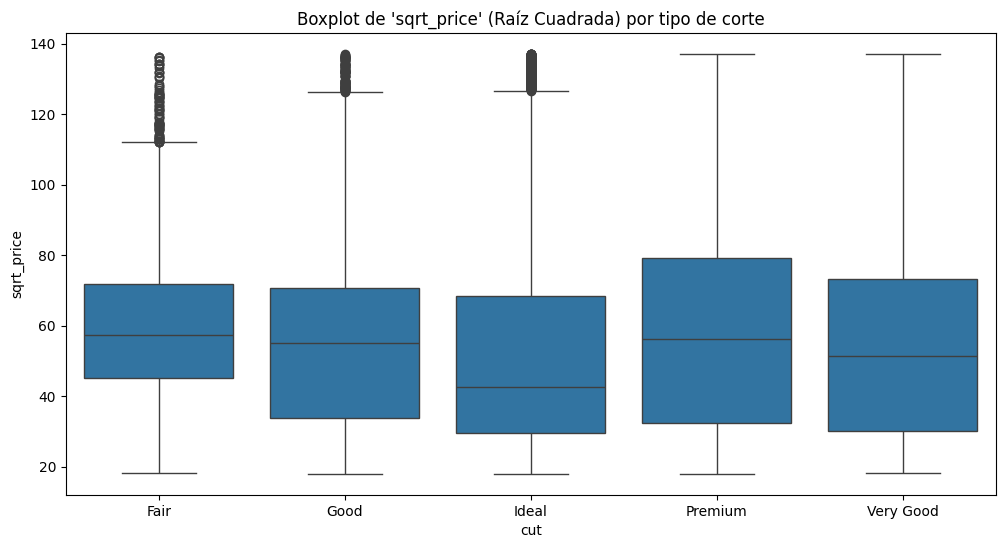

In [11]:
# Visualización: Histograma y Boxplot por tipo de corte

# Gráfico 1: Histograma de 'price' transformado por tipo de corte
plt.figure(figsize=(12, 6))
sns.histplot(df, x='price', hue='cut', kde=True, multiple='stack')
plt.title("Distribución de 'price' por tipo de corte")
plt.show()

# Gráfico 2: Histograma de 'log_price' transformado por tipo de corte
plt.figure(figsize=(12, 6))
sns.histplot(df, x='log_price', hue='cut', kde=True, multiple='stack')
plt.title("Distribución de 'log_price' (Logaritmo) por tipo de corte")
plt.show()

# Gráfico 3: Histograma de 'sqrt_price' transformado por tipo de corte
plt.figure(figsize=(12, 6))
sns.histplot(df, x='sqrt_price', hue='cut', kde=True, multiple='stack')
plt.title("Distribución de 'sqrt_price' (Raíz Cuadrada) por tipo de corte")
plt.show()

# Boxplot 1: Boxplot de 'price' por tipo de corte
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='price', data=df)
plt.title("Boxplot de 'price' por tipo de corte")
plt.show()

# Boxplot 2: Boxplot de 'log_price' por tipo de corte
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='log_price', data=df)
plt.title("Boxplot de 'log_price' (Logaritmo) por tipo de corte")
plt.show()

# Boxplot 3: Boxplot de 'sqrt_price' por tipo de corte
plt.figure(figsize=(12, 6))
sns.boxplot(x='cut', y='sqrt_price', data=df)
plt.title("Boxplot de 'sqrt_price' (Raíz Cuadrada) por tipo de corte")
plt.show()



   price price_category
0  326.0         Barato
1  326.0         Barato
2  327.0         Barato
3  334.0         Barato
4  335.0         Barato


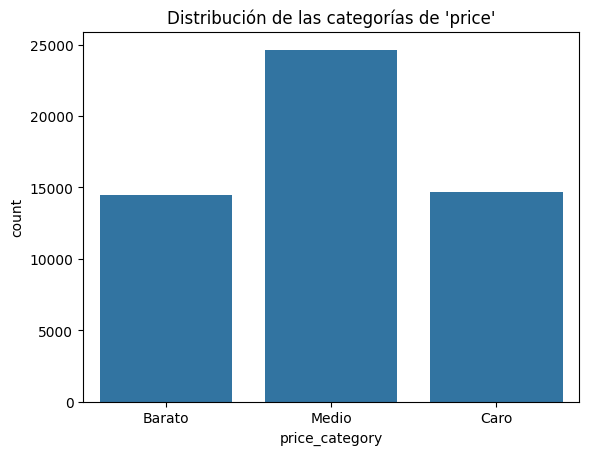

In [12]:

# 3. **Discretizar la columna precio en 3-4 categorías: barato, medio, caro**
bins = [0, 1000, 5000, df['price'].max()]  
labels = ['Barato', 'Medio', 'Caro']   

df['price_category'] = pd.cut(df['price'], bins=bins, labels=labels)
print(df[['price', 'price_category']].head())

# Visualización de las categorías
sns.countplot(x='price_category', data=df)
plt.title("Distribución de las categorías de 'price'")
plt.show()



# PARTE 4: 30 % visualizaciones:

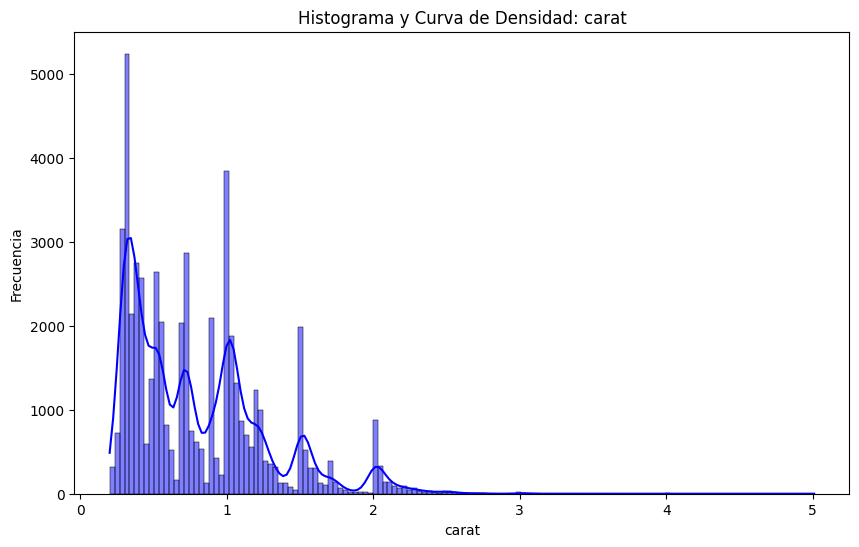

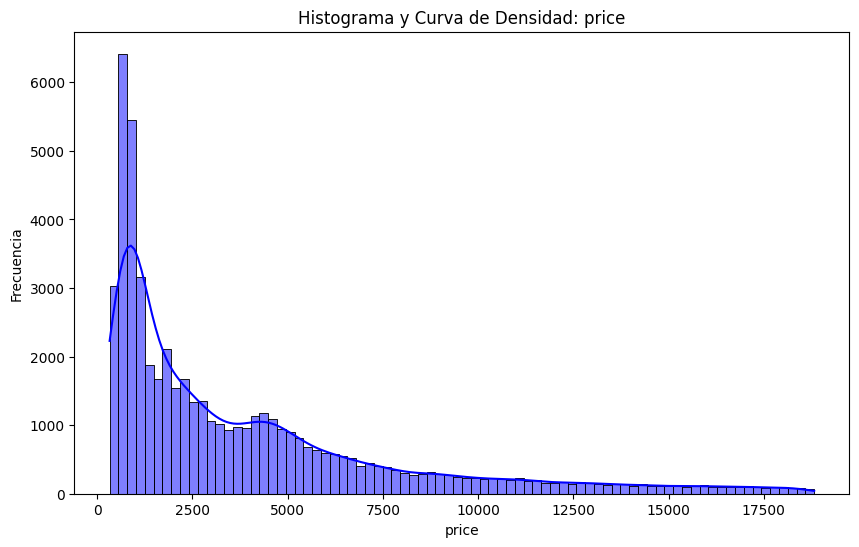

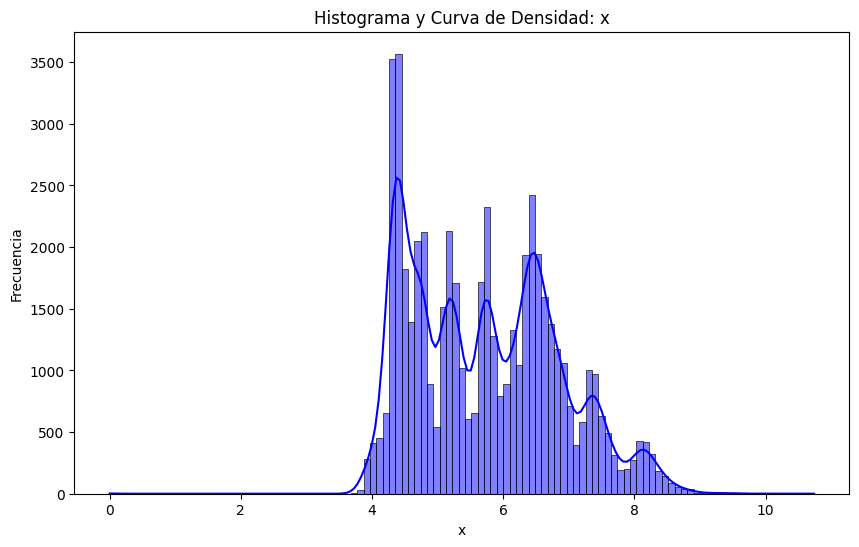

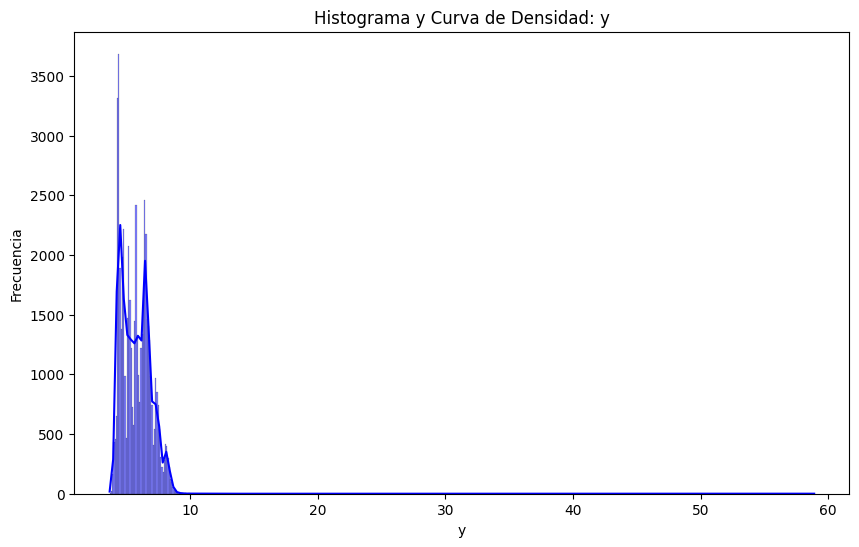

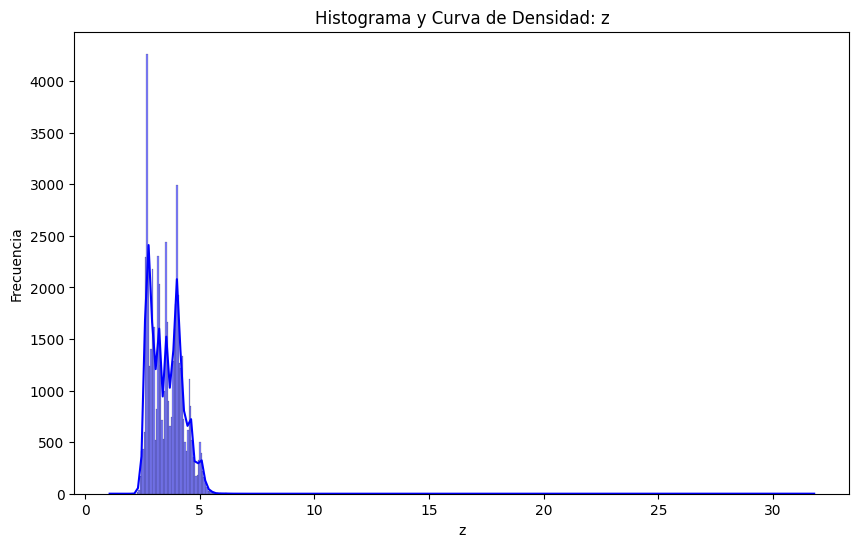

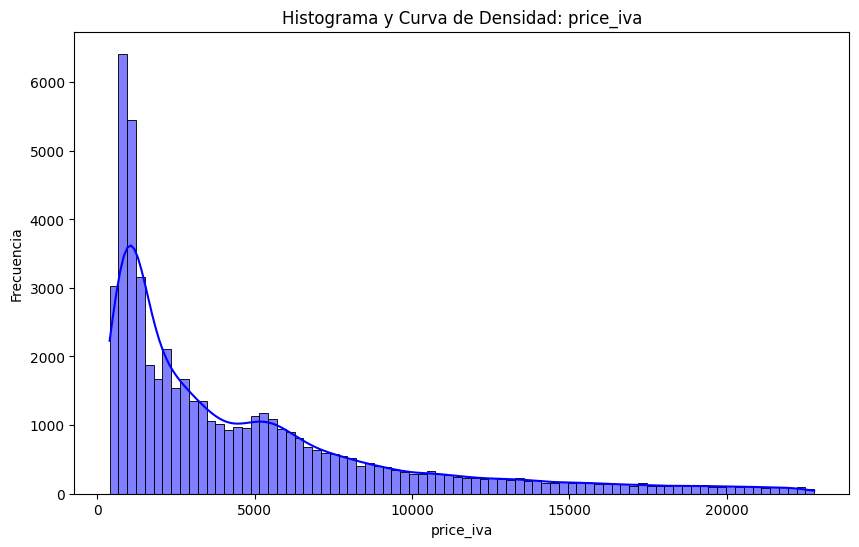

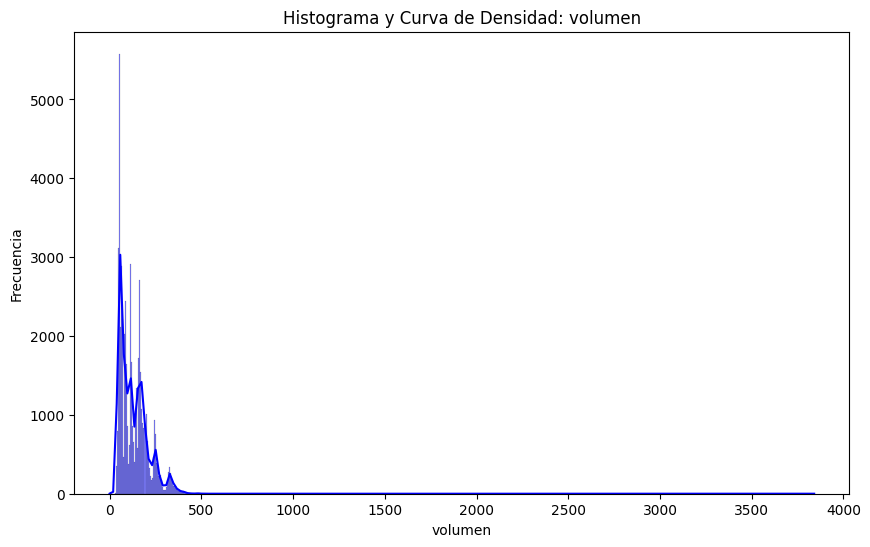

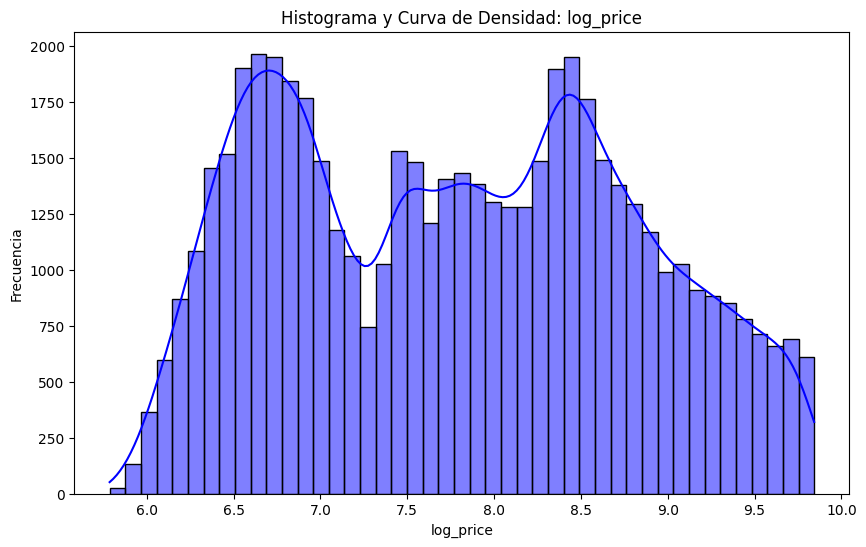

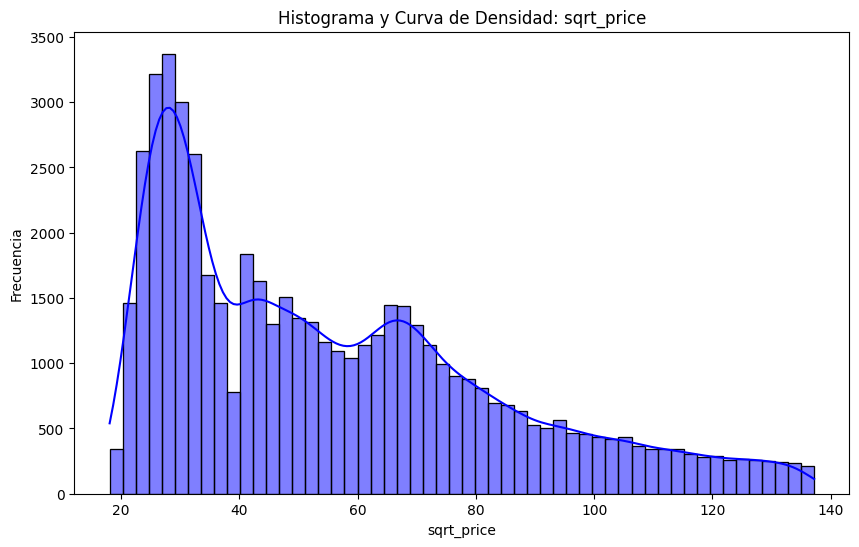

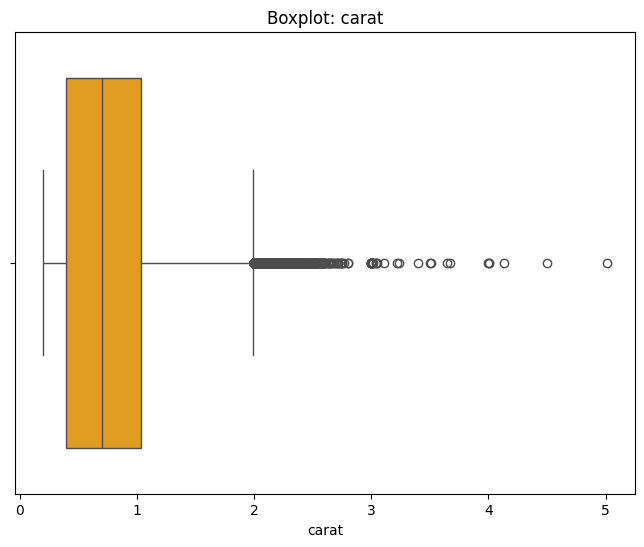

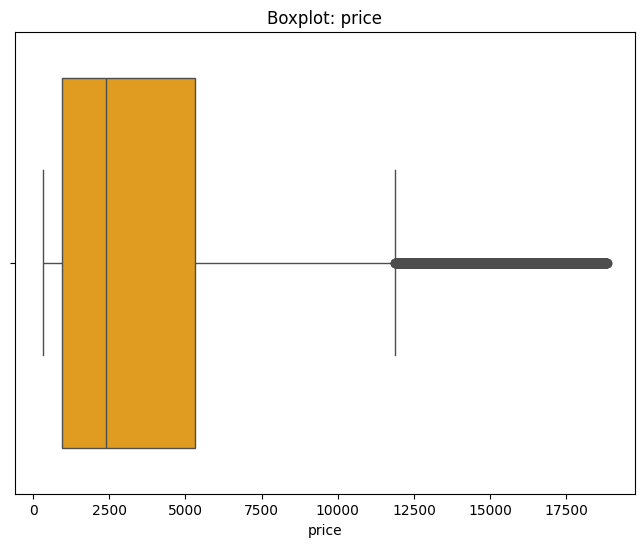

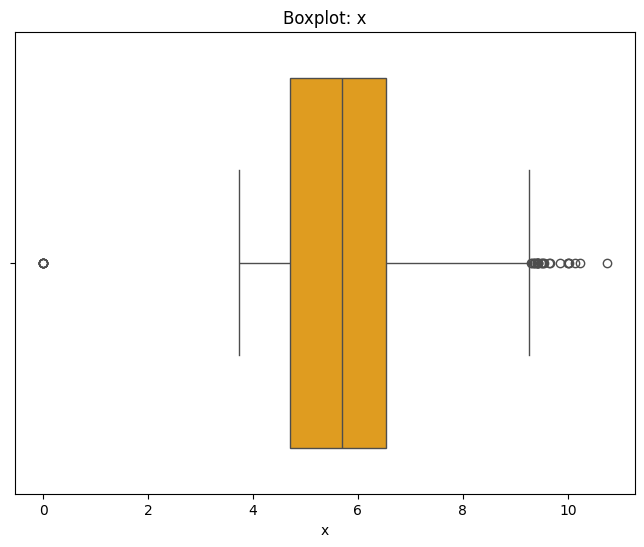

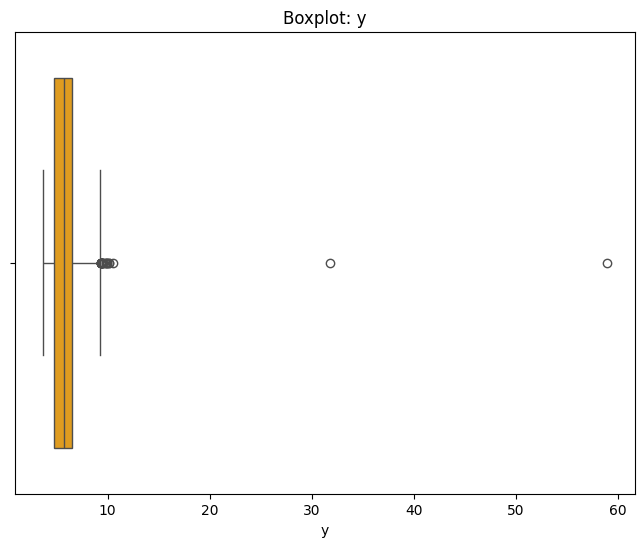

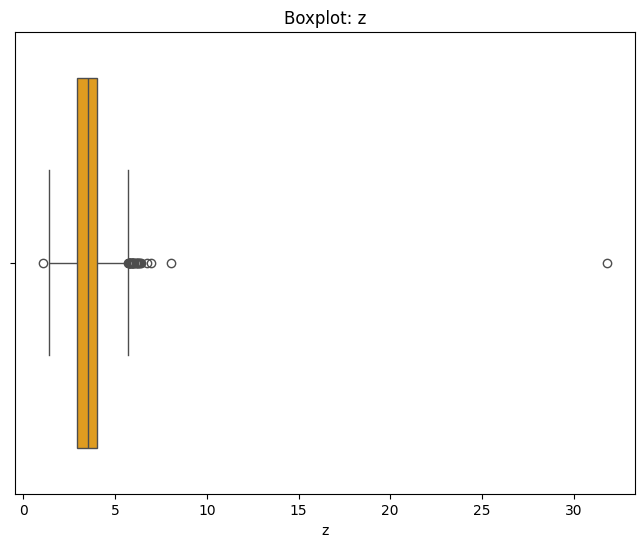

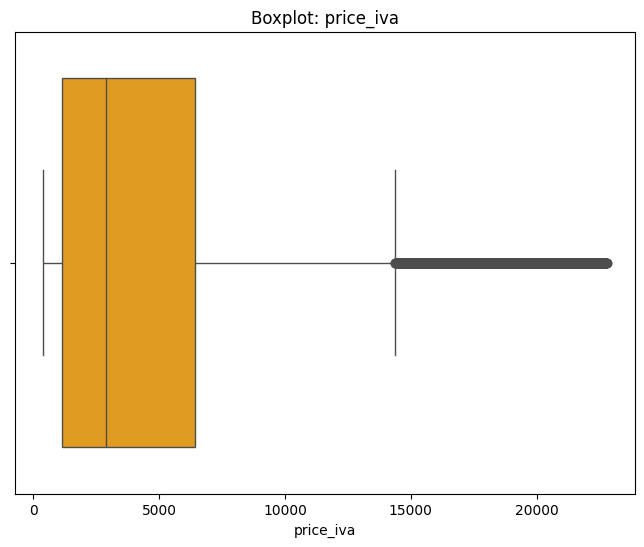

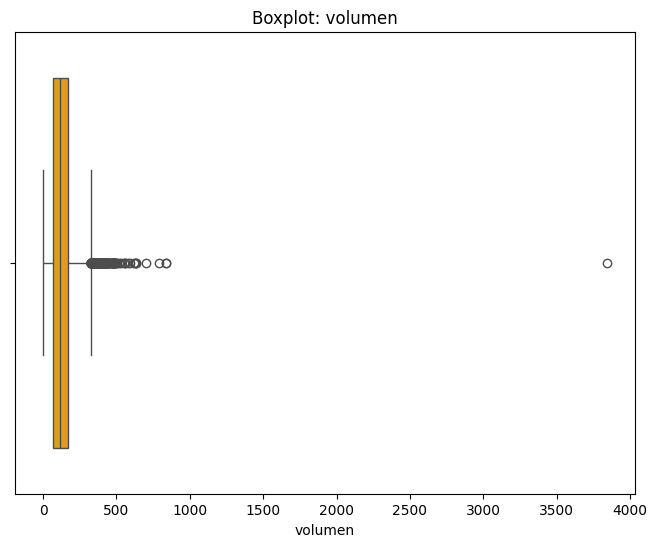

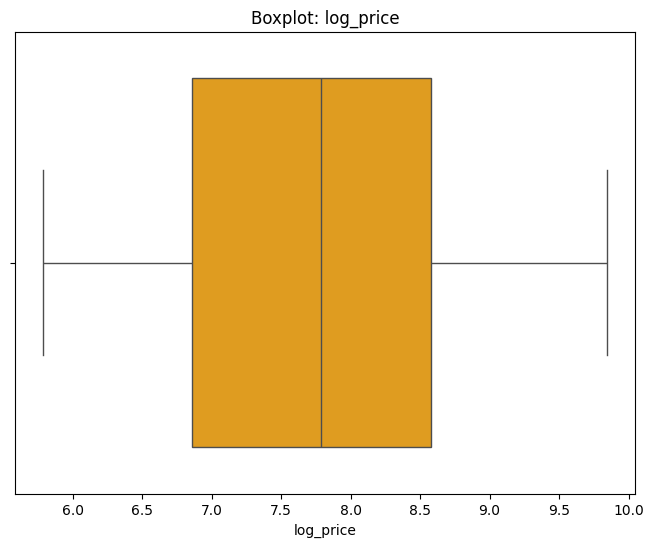

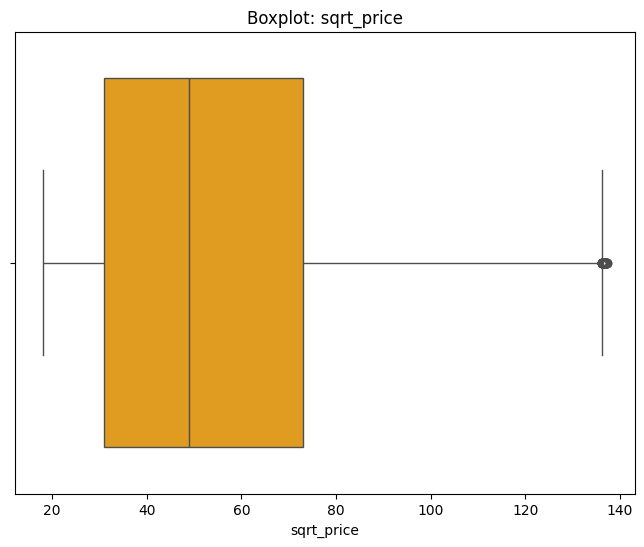

C:\Users\nerea\AppData\Local\Temp\ipykernel_16060\3864522868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


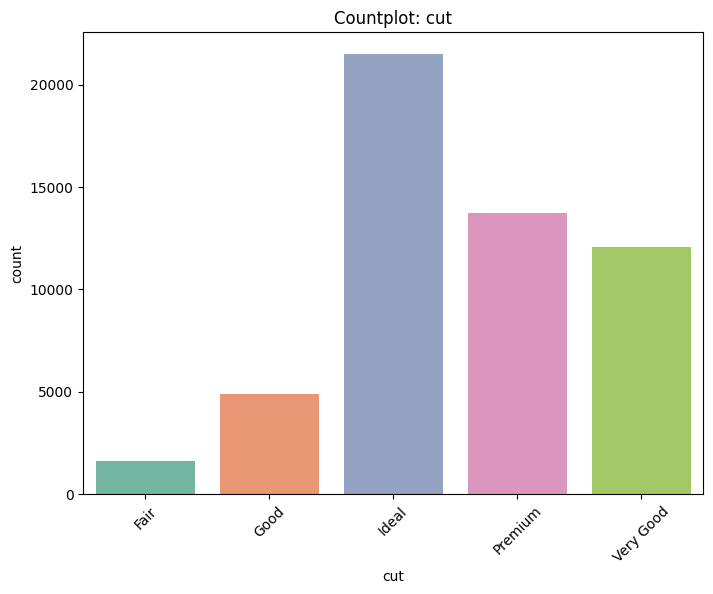

C:\Users\nerea\AppData\Local\Temp\ipykernel_16060\3864522868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


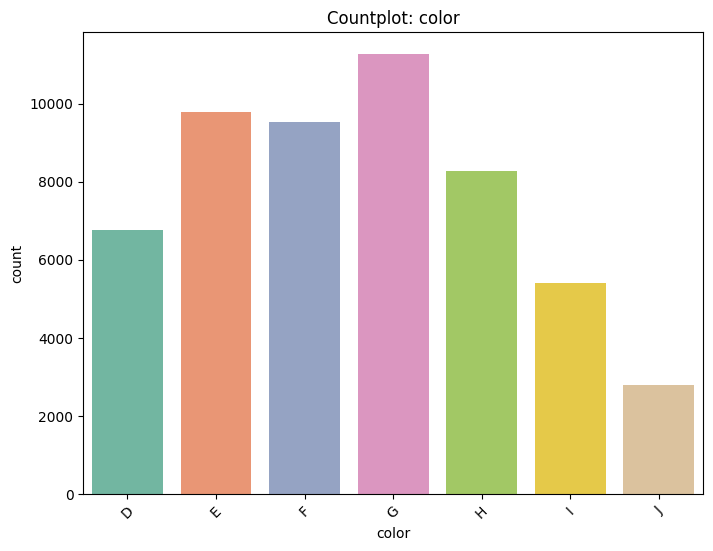

C:\Users\nerea\AppData\Local\Temp\ipykernel_16060\3864522868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


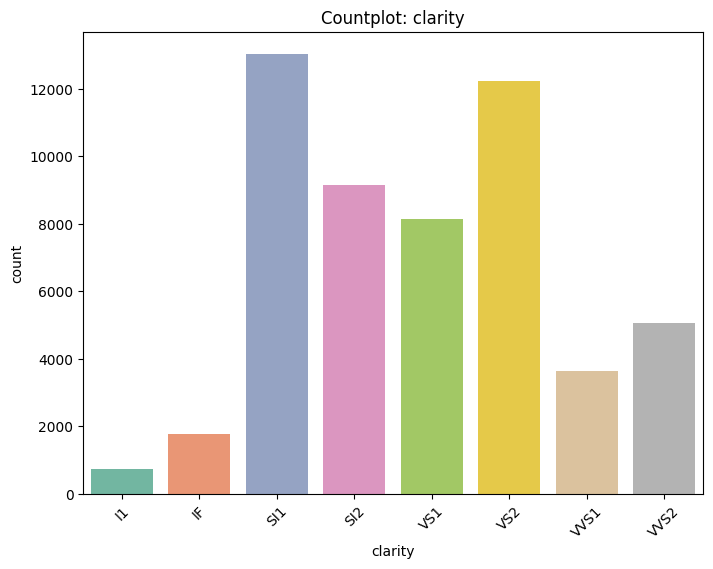

C:\Users\nerea\AppData\Local\Temp\ipykernel_16060\3864522868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


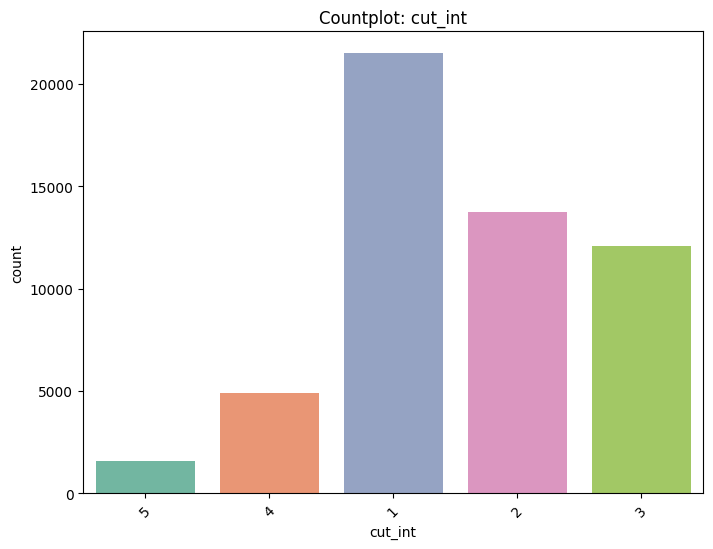

C:\Users\nerea\AppData\Local\Temp\ipykernel_16060\3864522868.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Set2")


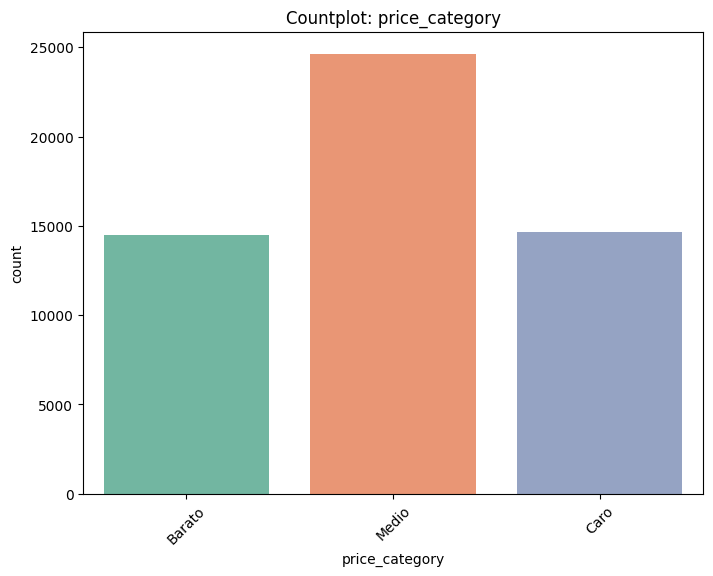

In [13]:


# UNIVARIANTES

# 1. Histogramas y Curvas de Densidad
columnas_numericas = df.select_dtypes(include=["float32"]).columns
for col in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(f"Histograma y Curva de Densidad: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# 2. Boxplot
for col in columnas_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color="orange")
    plt.title(f"Boxplot: {col}")
    plt.show()

# 3. Countplot para las variables categóricas
columnas_categoricas = df.select_dtypes(include=["category"]).columns
for col in columnas_categoricas:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[col], palette="Set2")
    plt.title(f"Countplot: {col}")
    plt.xticks(rotation=45)
    plt.show()


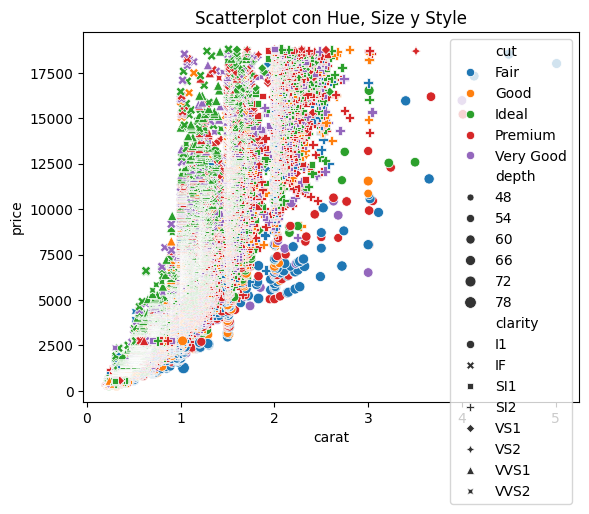

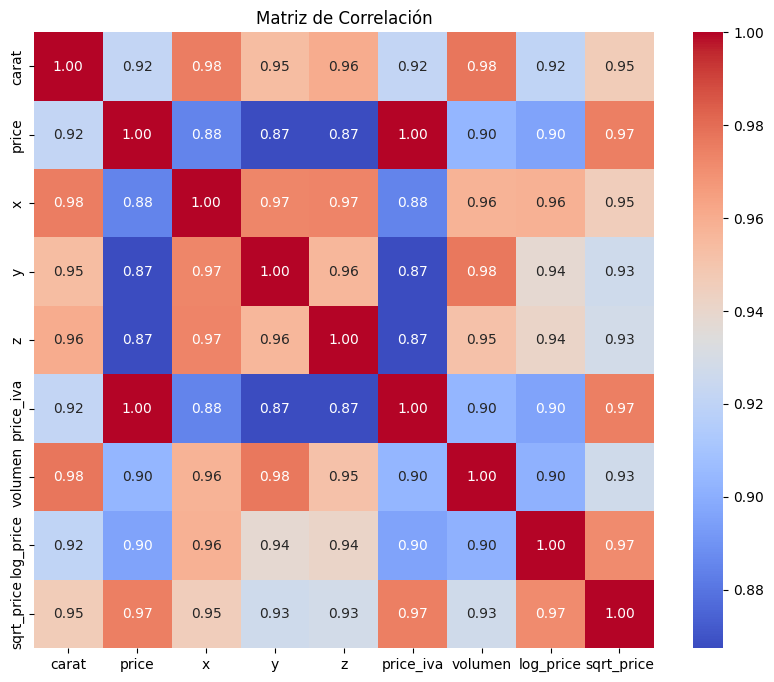

C:\Users\nerea\AppData\Local\Temp\ipykernel_16060\1652715711.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlaciones_price.index, y=correlaciones_price.values, palette="Blues_d")


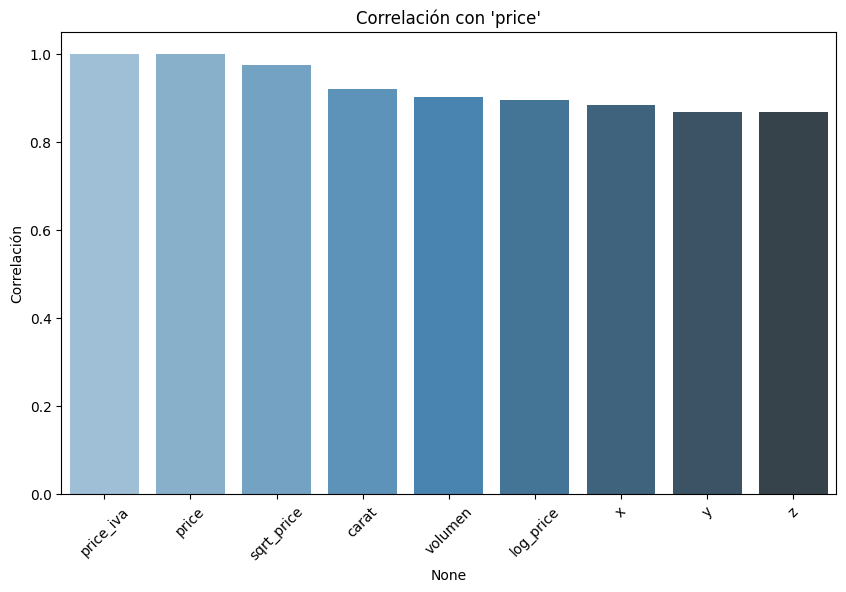

C:\Users\nerea\AppData\Local\Temp\ipykernel_16060\1652715711.py:25: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='cut', columns='color', values='price', aggfunc='mean')


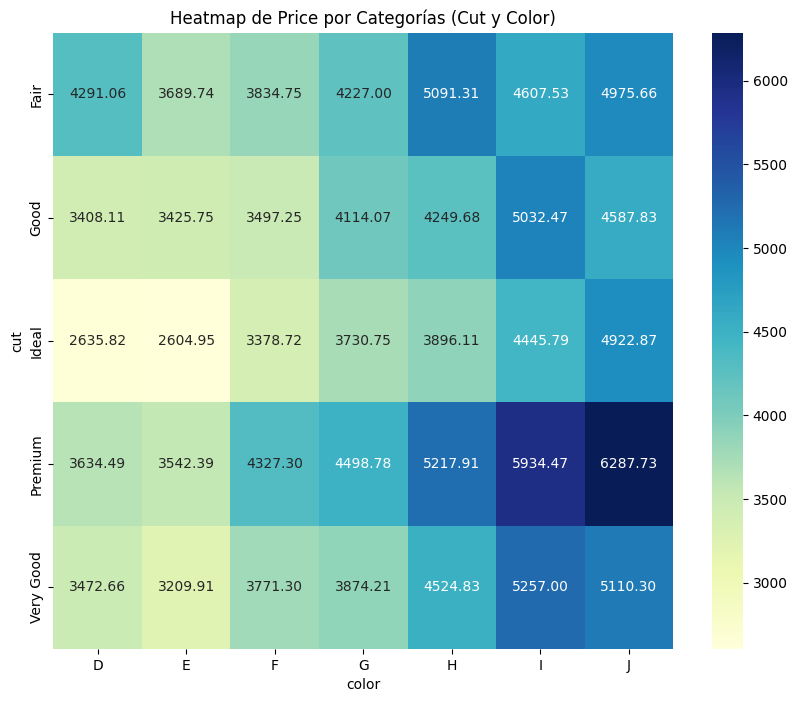

In [14]:

# BIVARIANTES Y MULTIVARIANTES

# 1. Scatterplot con Hue, Size y Style
sns.scatterplot(data=df, x='carat', y='price', hue='cut', size='depth', style='clarity')
plt.title("Scatterplot con Hue, Size y Style")
plt.show()

# 2. Calcular Correlación y Mostrarla con Heatmap
correlacion = df.select_dtypes(include=["float32"]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# 3. Correlación en Gráfico de Barras para 'Price'
correlaciones_price = correlacion['price'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=correlaciones_price.index, y=correlaciones_price.values, palette="Blues_d")
plt.title("Correlación con 'price'")
plt.ylabel("Correlación")
plt.xticks(rotation=45)
plt.show()

# 4. Pivot Table y Heatmap
pivot_table = df.pivot_table(index='cut', columns='color', values='price', aggfunc='mean')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap de Price por Categorías (Cut y Color)")
plt.show()


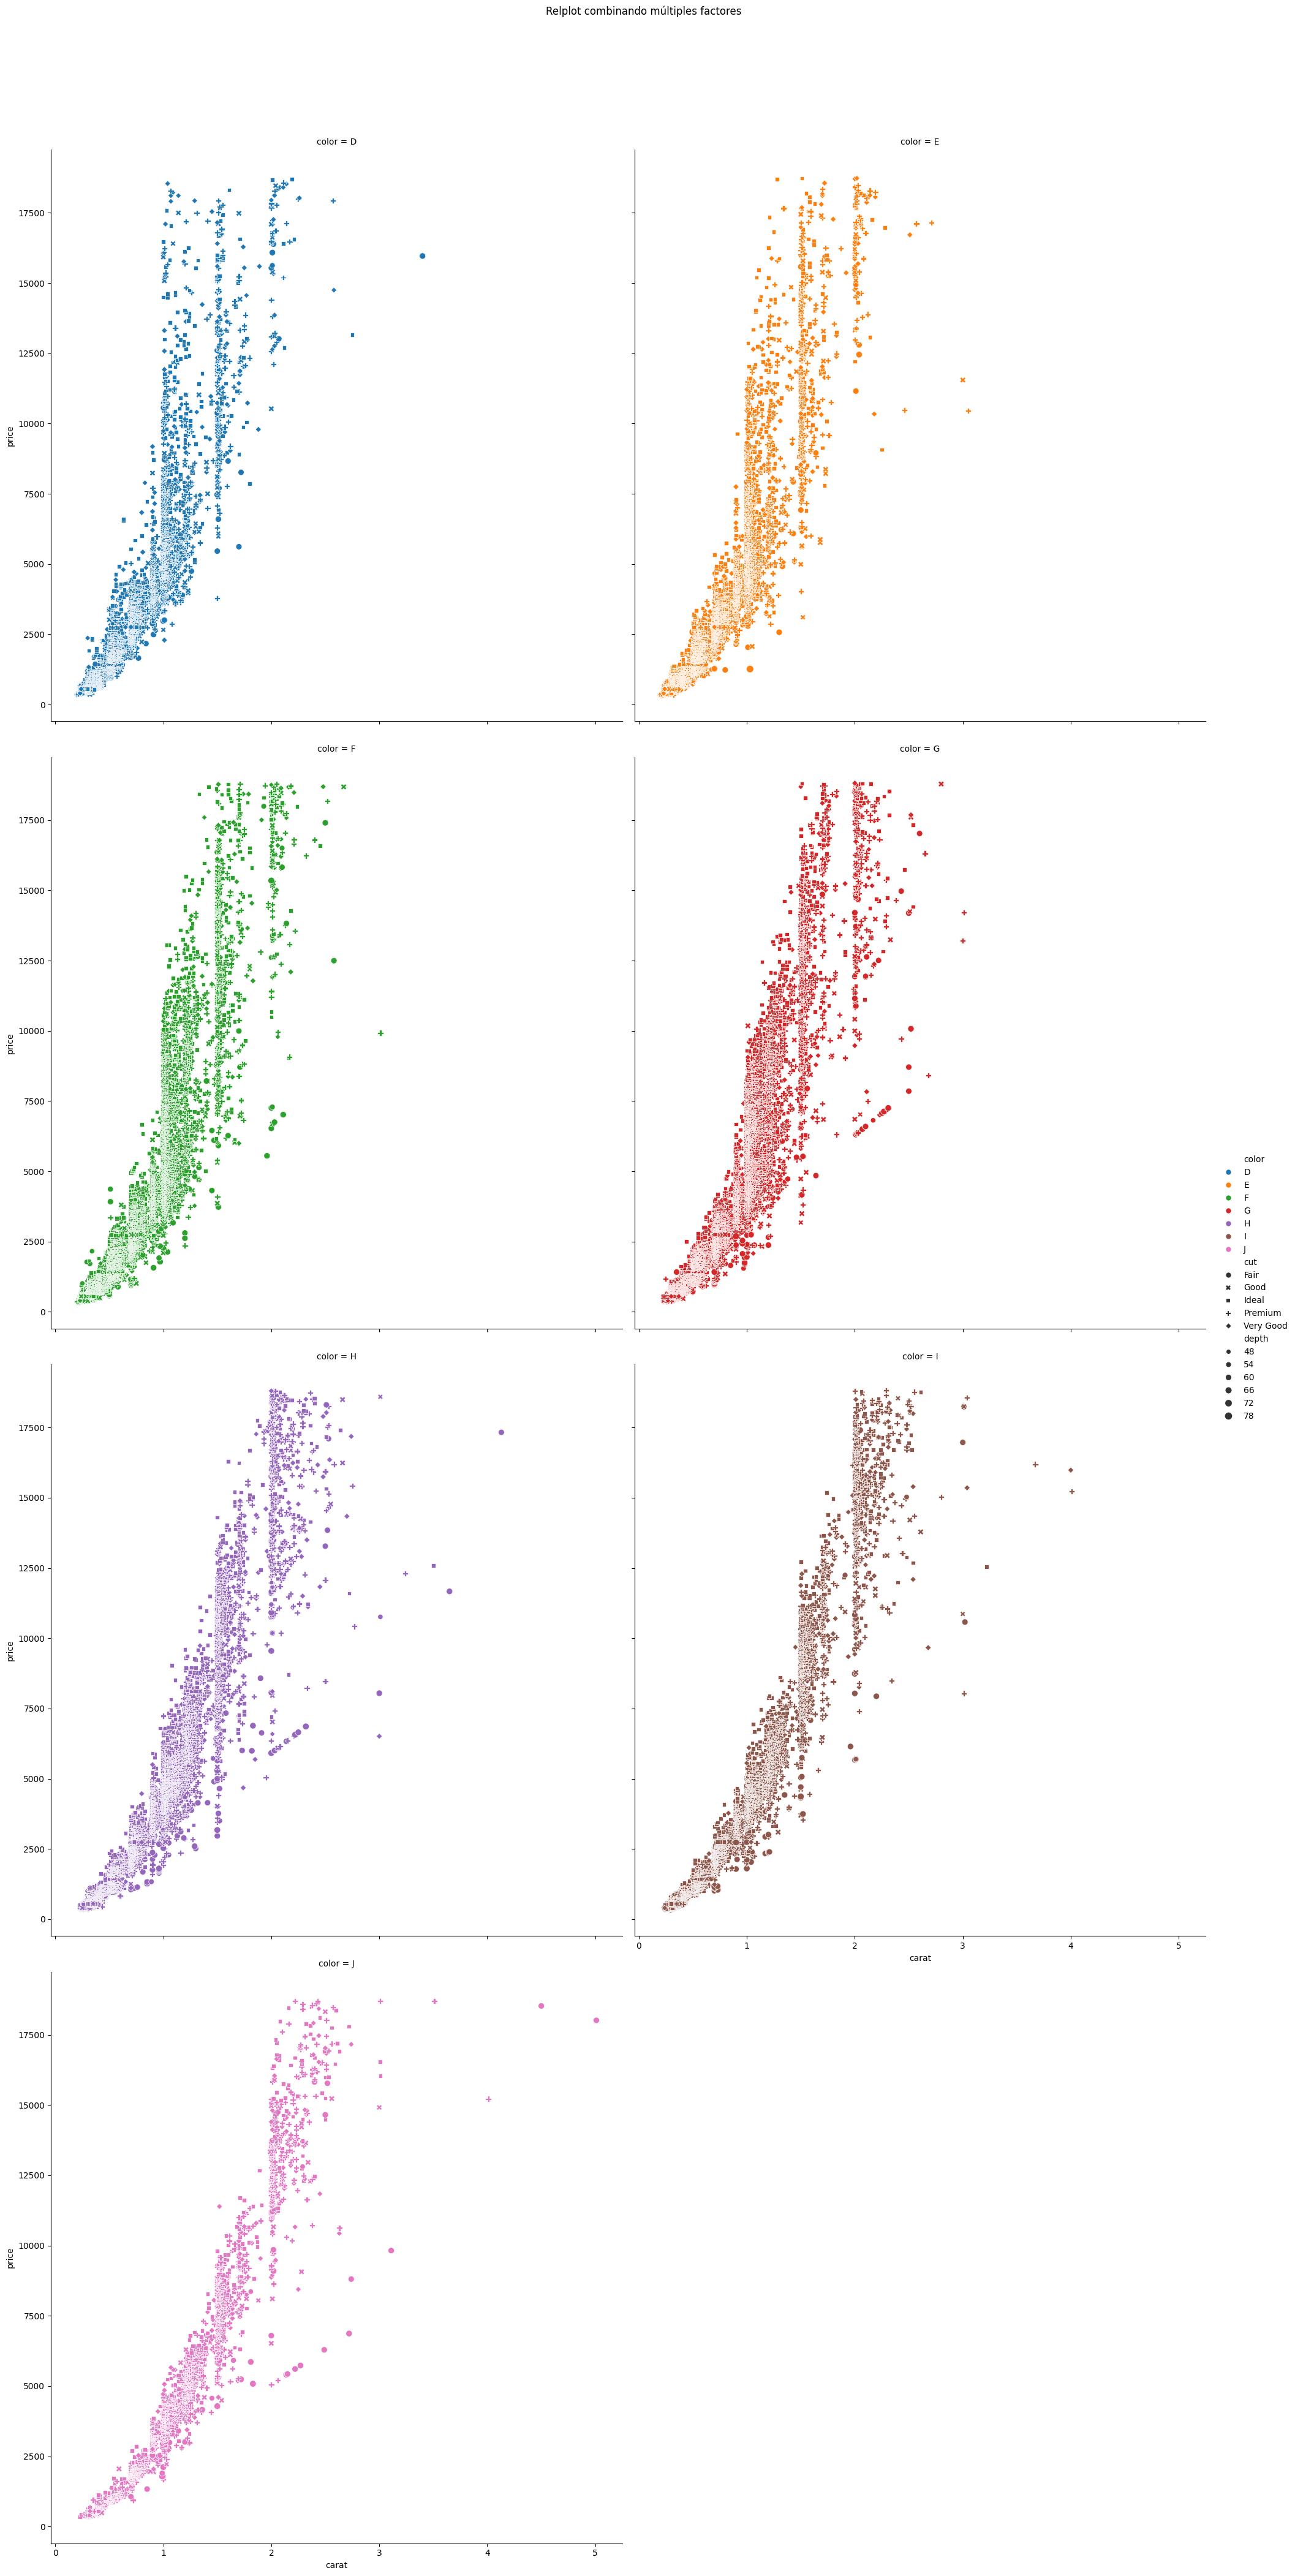

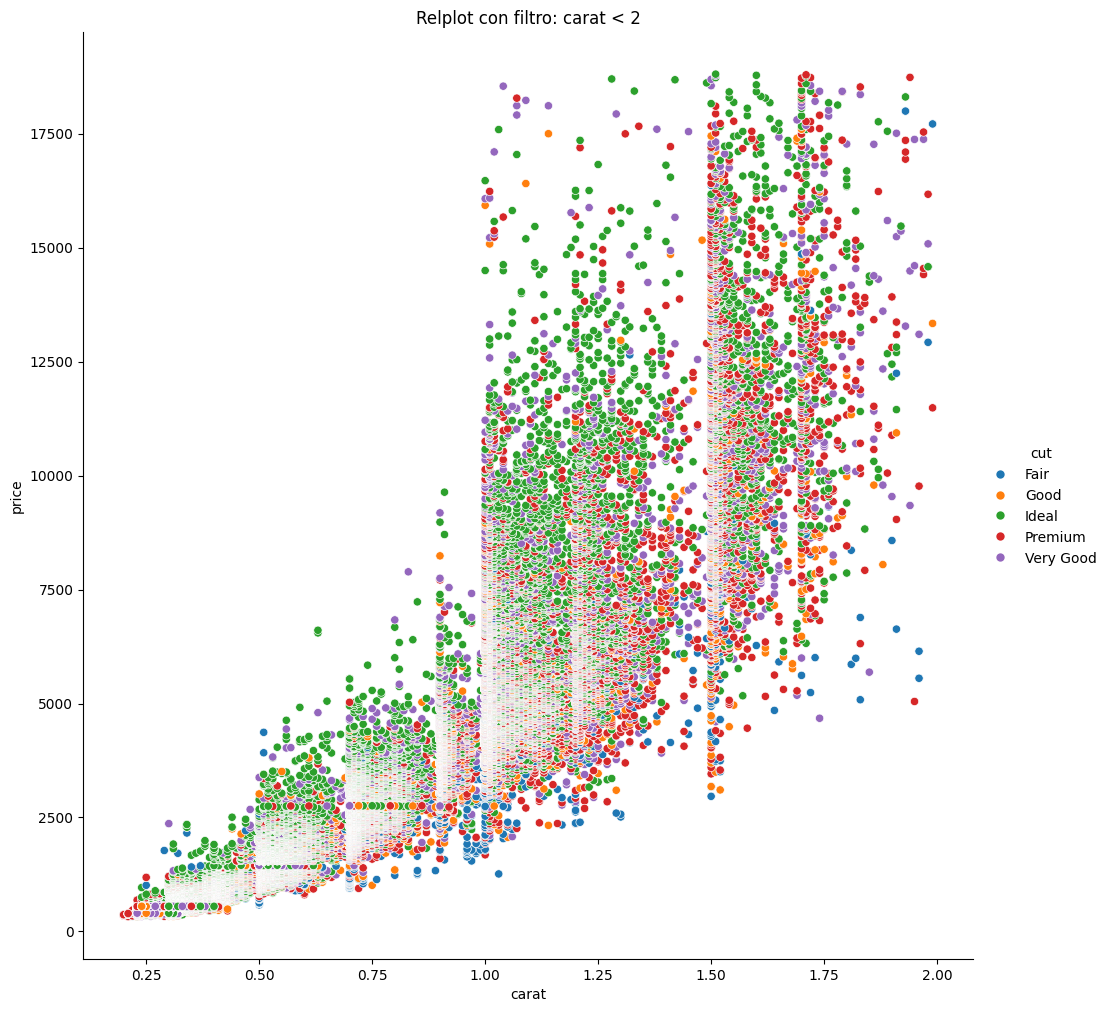

In [26]:
# COMBINAR CON RELPLOT Y FILTROS

sns.relplot(
    data=df, 
    x='carat', 
    y='price', 
    hue='color', 
    size='depth', 
    style='cut', 
    col='color', 
    kind="scatter", 
    height=10, 
    col_wrap=2  
)

plt.suptitle("Relplot combinando múltiples factores", y=1.05)
plt.show()


# 2. Relplot con filtro: Visualizar solo diamantes con carat < 2
df_filtrado = df[df['carat'] < 2]
sns.relplot(
    data=df_filtrado, 
    x='carat', 
    y='price', 
    hue='cut', 
    kind="scatter",
    height=10,
)
plt.title("Relplot con filtro: carat < 2")
plt.show()

